In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 首先我们构造训练集，这里使用的方式是首先产生0到5之间的随机数作为x，然后使用sin()函数映射得到y，之后再对y中的一些点进行加减一个数
# 使其成为噪点。

# 首先生成随机种子
rng = np.random.RandomState(1)
# 生成80行1列的随机数
pre_x = rng.rand(80,1)
# 对随机数增加5倍并且按照列排序
x = np.sort(5 * pre_x, axis = 0)
# 使用np中的sin()函数生成y并降维成一位数组
y = np.sin(x).ravel()

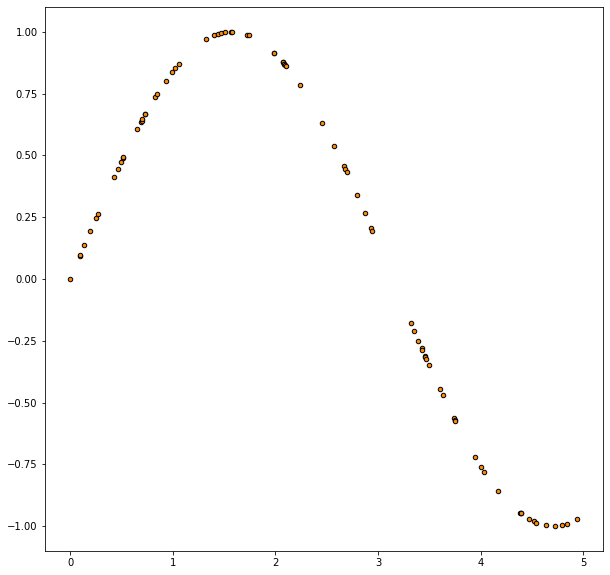

In [9]:
# 生成sin()的函数图像
plt.figure(figsize=(10,10))
plt.scatter(x,y,s=20,edgecolor='black',c='darkorange',label='data')

In [10]:
# 增加噪点
y[::5] += 3*(0.5 - rng.rand(int(len(y)/5)))

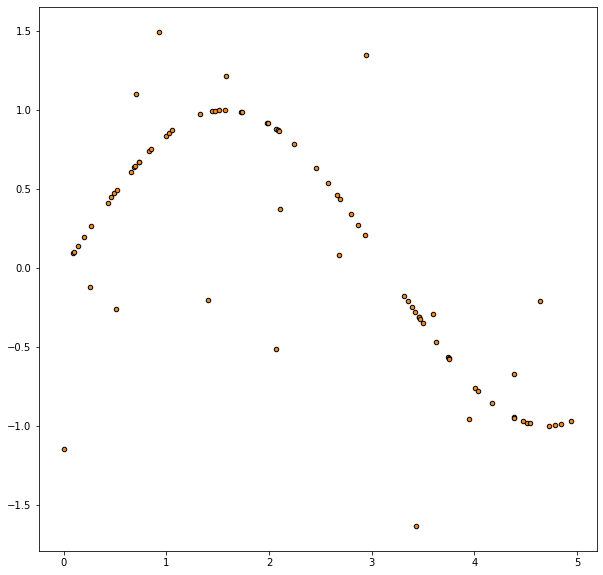

In [11]:
# 画出新的图像
plt.figure(figsize=(10,10))
plt.scatter(x,y,s=20,edgecolor='black', c='darkorange',label='data')

In [12]:
# 接下来就是使用sklearn构造模型
from sklearn.tree import DecisionTreeRegressor
reg_model_1 = DecisionTreeRegressor(max_depth=2)
reg_model_2 = DecisionTreeRegressor(max_depth=5)

In [13]:
# 将训练集放入模型进行训练
reg_model_1.fit(x,y)
reg_model_2.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [14]:
# 导入测试集
x_test = np.arange(0.5,5.0,0.01)[:, np.newaxis]

In [18]:
# 将测试集导入模型
y_1 = reg_model_1.predict(x_test)
y_2 = reg_model_2.predict(x_test)

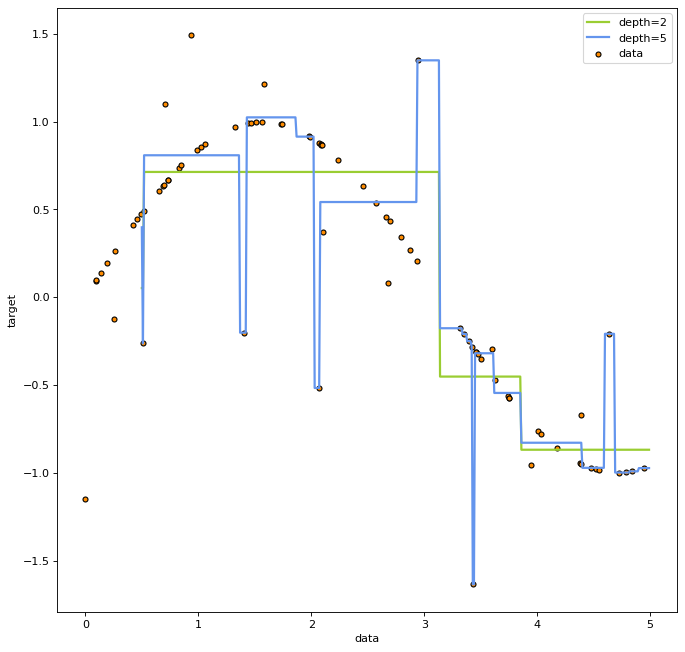

In [17]:
# 绘制图形
# 首先告诉Python我要开始画图了
plt.figure(figsize=(10,10),dpi=80)
# 绘制我们的训练集对应的散点图
plt.scatter(x,y,s=20,edgecolor='black',c='darkorange',label='data')
# 绘制模型1对应的折线图
plt.plot(x_test,y_1,color='yellowgreen', label='depth=2', linewidth=2)
# 绘制模型2对应的折线图
plt.plot(x_test,y_2,color='cornflowerblue',label='depth=5',linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()